In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This will handle any type of binary target int or categorical
class Perceptron:

    def predict(self, X):
        X = self.add_bias(X)
        convert_to_class = lambda c: self.classes[1] if c >= 0 else self.classes[0]
        return np.vectorize(convert_to_class)(X.dot(self.weights))
    
    def fit(self, X, y, epochs=1000, lr=0.001):
        self.classes = np.unique(y)
        X = self.add_bias(X)
        y = (y == self.classes[1]) * 1
        self.weights = np.zeros(X.shape[1])
        for _ in range(epochs): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)

In [9]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [10]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


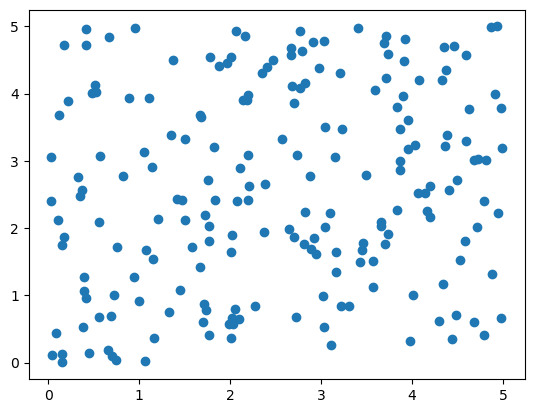

In [12]:
# Plot the data
plt.scatter(x['X'], x['Y'])

In [13]:
# Create the model
model = Perceptron()

# Train the model
model.fit(x.values, y.values)

ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (200,3)